<img src="logo.png">

# Creación de un mapa de EEUU a partir de los vuelos realizados desde algunos de los aeropuertos en NYC durante 2013

A partir de la librería ``nycflithts13`` se construirán dos mapas:

1) Uno indicando los tres aeropuertos de origen de la tabla ``flights``, los aeropuertos de destino, el Estado de Nueva York en rojo y el iluminado de los estados restantes dependiendo del número de vuelos que se hicieron hacia ellos, respectivamente.

2) Otro que muestre los trayectos realizados desde cada origen de la tabla ``flights`` hacia su destino.

In [1]:
### Cargado de bibliotecas y objetos importantes

######## Cargado de bibliotecas 
library(nycflights13)
library(tidyverse)

######## Cargado de fifty_states, donde tenemos el mapa político de EEUU
load("fifty_states.rda")

######## Lectura de mis_aeropuertos.csv. En esta tabla tenemos la misma información de la tabla airports
######## pero con una columna extra que indica el estado al que pertenece cada aeropuerto.
mis_aeropuertos = read.csv("aeropuertos.csv")

Warning message:
"package 'nycflights13' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts --------------------------------------------

In [2]:
######## Nos llevamos la información del estado destino así como latitud y longitud del aeropuerto destino
######## desde la tabla mis_aeropuertos hasta la tabla flights mediante las colunas dest y faa

mis_vuelos = left_join(flights,mis_aeropuertos[,c("faa","state","lat","lon")],
                       by = c("dest"="faa"))

######## Calculamos el total de vuelos a cada estado
mis_vuelos_totales = mis_vuelos %>%
  group_by(state) %>% summarize(total = n())

######## Nos llevamos el total de vuelos por cada estado a la tabla fifty_states
mapa = left_join(fifty_states,mis_vuelos_totales,
                 by = c("id"="state"))

######## Creamos una tabla con únicamente la información de Nueva York
new_york_mapa = mapa %>% filter(id == "new york")

######## Obtenemos las coordenadas de los aeropuertos de interés en Nueva York
aeropuertos_nyc = mis_aeropuertos %>%
  filter(faa %in% c("EWR","JFK","LGA")) %>%
  select(faa,lat,lon)

######## Filtramos los vuelos que ocurrieron fuera de Hawaii y Alaska.
vuelos_continentales = mis_vuelos %>%
  filter(!state %in% c("alaska","hawaii"))

Warning message:
"Removed 7602 rows containing missing values (geom_point)."

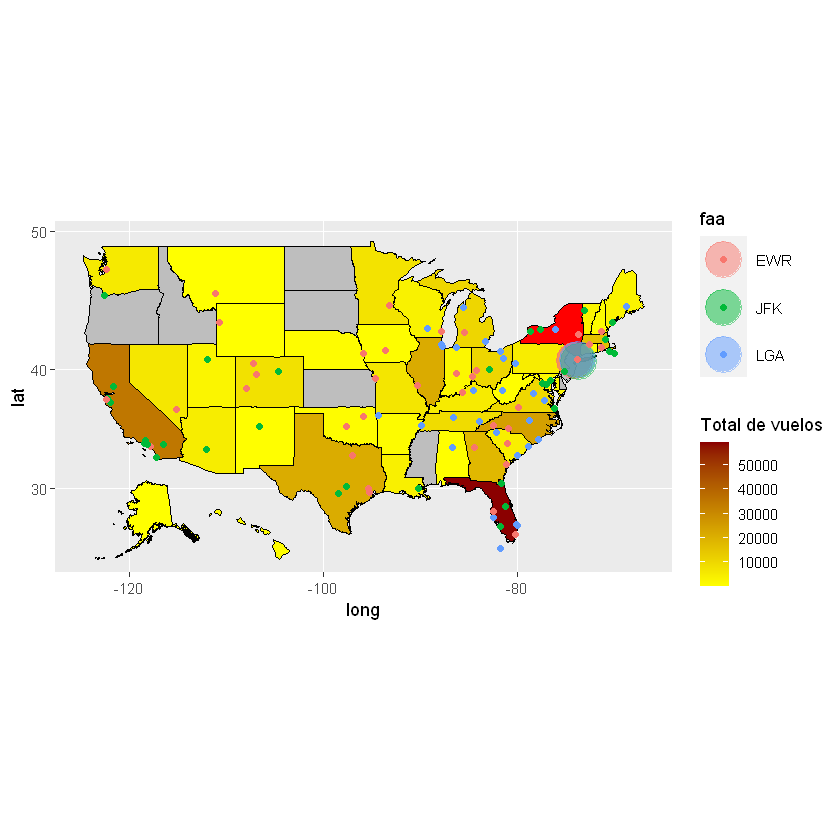

In [3]:
##### Primer mapa

ggplot()+
  geom_polygon(data = mapa,
               mapping = aes(x=long,y=lat,group=group,fill=total),
               color = "black") +
  scale_fill_gradient(low = "yellow",
                      high = "darkred",
                      na.value = "gray",
                      name="Total de vuelos") +
  geom_polygon(data = new_york_mapa,
               mapping = aes(x=long,y=lat,group=group),
               fill = "red",
               color = "black")+
  geom_point(data = aeropuertos_nyc,
             mapping = aes(x=lon,y=lat,color=faa),
             size=10,
             alpha = 0.5) +
  geom_point(data = vuelos_continentales,
             mapping = aes(x=lon,y=lat,color = origin)) +
  coord_map()

In [4]:
###### Seleccionamos las coordenadas de los aeropuertos destino para cada origen particular

vuelos_ewr = vuelos_continentales %>%
  filter(origin == "EWR") %>%
  select(lat,lon) %>%
  distinct()

vuelos_jfk = vuelos_continentales %>%
  filter(origin == "JFK") %>%
  select(lat,lon) %>%
  distinct()

vuelos_lga = vuelos_continentales %>%
  filter(origin == "LGA") %>%
  select(lat,lon) %>%
  distinct()

Warning message:
"Removed 7602 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_curve)."Warning message:
"Removed 1 rows containing missing values (geom_curve)."

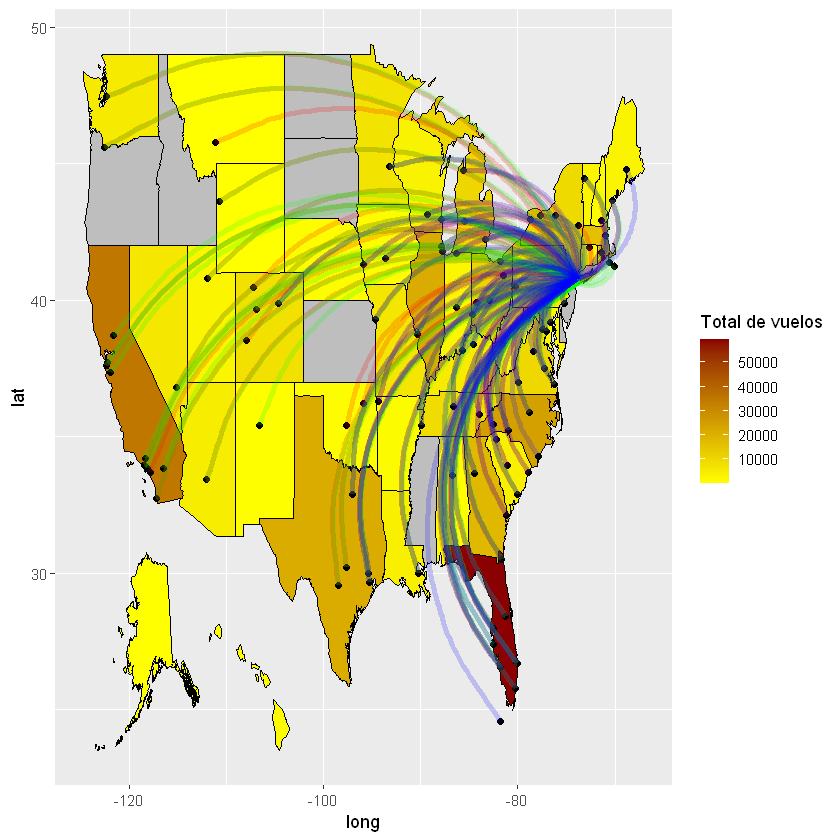

In [5]:
##### Segundo mapa: utilizamos la geometría geom_curve. Esta no admite coord_map, por lo cual en Jupyter se muestra 
##### algo deforme. Sin embargo, en RStudio se muestra mucho mejor.

ggplot()+
  geom_polygon(data = mapa,
               mapping = aes(x=long,y=lat,group=group,fill=total),
               color = "black") +
  scale_fill_gradient(low = "yellow",
                      high = "darkred",
                      na.value = "gray",
                      name="Total de vuelos") +
  geom_point(data = vuelos_continentales,
             mapping = aes(x=lon,y=lat)) +
  geom_curve(mapping = aes(x=aeropuertos_nyc$lon[1],y=aeropuertos_nyc$lat[1],
                           xend = vuelos_ewr$lon,yend = vuelos_ewr$lat),
             color = "red",
             size = 1.5,
             alpha=0.2) +
  geom_curve(mapping = aes(x=aeropuertos_nyc$lon[3],y=aeropuertos_nyc$lat[3],
                           xend = vuelos_jfk$lon,yend = vuelos_jfk$lat),
             color = "green",
             size = 1.5,
             alpha=0.2) +
  geom_curve(mapping = aes(x=aeropuertos_nyc$lon[4],y=aeropuertos_nyc$lat[4],
                           xend = vuelos_lga$lon,yend = vuelos_lga$lat),
             color = "blue",
             size = 1.5,
             alpha=0.2)  